##Heart Disease Prediction using Machine Learning Approach


The dataset to be used in this project is downloaded from the site(https://www.kaggle.com/johnsmith88/heart-disease-dataset)
The data was collected at a local hospital in Cleverland Hungary 


## 1. Dataset description<a id='data-desc'></a>

This dataset consists of 11 features and a target variable. It has 6 nominal variables and 5 numeric variables. The detailed description of all the features are as follows:

**1. Age:** Patients Age in years (Numeric)<br>
**2. Sex:** Gender of patient (Male - 1, Female - 0) (Nominal)<br>
**3. Chest Pain Type:** Type of chest pain experienced by patient categorized into 1 typical, 2 typical angina, 3 non-        anginal pain, 4 asymptomatic (Nominal)<br>
**4. resting bp s:** Level of blood pressure at resting mode in mm/HG (Numerical)<br>
**5. cholestrol:** Serum cholestrol in mg/dl (Numeric)<br>
**6. fasting blood sugar:** Blood sugar levels on fasting > 120 mg/dl represents as 1 in case of true and 0 as false (Nominal)<br>
**7. resting ecg:** Result of electrocardiogram while at rest are represented in 3 distinct values 0 : Normal 1: Abnormality in ST-T wave 2: Left ventricular hypertrophy (Nominal)<br>
**8. max heart rate:** Maximum heart rate achieved (Numeric)<br>
**9. exercise angina:** Angina induced by exercise 0 depicting NO 1 depicting Yes (Nominal)<br>
**10. oldpeak:** Exercise induced ST-depression in comparison with the state of rest (Numeric)<br>
**11. ST slope:** ST segment measured in terms of slope during peak exercise 0: Normal 1: Upsloping 2: Flat 3: Downsloping (Nominal)<br>

#### Target variable
**12. target:** It is the target variable which we have to predict 1 means patient is suffering from heart risk and 0 means patient is normal.


##Library importing

In [1]:
import warnings
warnings.filterwarnings('ignore')

# data wrangling & pre-processing
import pandas as pd
import numpy as np

# data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split

#model validation
from sklearn.metrics import log_loss,roc_auc_score,precision_score,f1_score,recall_score,roc_curve,auc
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score,fbeta_score,matthews_corrcoef
from sklearn import metrics

# cross validation
from sklearn.model_selection import StratifiedKFold

# machine learning algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,VotingClassifier,AdaBoostClassifier,GradientBoostingClassifier,RandomForestClassifier,ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC 
#import xgboost as xgb

from scipy import stats


##Code to ensure google colab is running current vesion of tensorflow

In [2]:
try:
    %tensorflow_version 2.x
    COLAB = True
    print("Note: using Google CoLab")
except:
    print("Note: not using Google CoLab")
    COLAB = False

Note: not using Google CoLab


## LOAD DATASETS

In [3]:
dt = pd.read_csv('C:/Users/user/Documents/4.2/KBS/Heart-Disease-Prediction-Using-Machine-Learning-Ensemble-master/heart_statlog_cleveland_hungary_final.csv')

Lets see some of the sample entries of dataset

In [4]:
dt.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


 Data Cleaning & Preprocessing In this step we will first change the name of columns as some of the columns
have improper naming pattern and then we will encode the features into categorical variable

In [5]:
# renaming features to proper name
dt.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope','target']

In [6]:
# converting features to categorical features 

dt['chest_pain_type'][dt['chest_pain_type'] == 1] = 'typical angina'
dt['chest_pain_type'][dt['chest_pain_type'] == 2] = 'atypical angina'
dt['chest_pain_type'][dt['chest_pain_type'] == 3] = 'non-anginal pain'
dt['chest_pain_type'][dt['chest_pain_type'] == 4] = 'asymptomatic'



dt['rest_ecg'][dt['rest_ecg'] == 0] = 'normal'
dt['rest_ecg'][dt['rest_ecg'] == 1] = 'ST-T wave abnormality'
dt['rest_ecg'][dt['rest_ecg'] == 2] = 'left ventricular hypertrophy'



dt['st_slope'][dt['st_slope'] == 1] = 'upsloping'
dt['st_slope'][dt['st_slope'] == 2] = 'flat'
dt['st_slope'][dt['st_slope'] == 3] = 'downsloping'

dt["sex"] = dt.sex.apply(lambda  x:'male' if x==1 else 'female')

In [7]:
dt['chest_pain_type'].value_counts()

asymptomatic        625
non-anginal pain    283
atypical angina     216
typical angina       66
Name: chest_pain_type, dtype: int64

In [8]:
dt['rest_ecg'].value_counts()

normal                          684
left ventricular hypertrophy    325
ST-T wave abnormality           181
Name: rest_ecg, dtype: int64

In [9]:
dt['st_slope'].value_counts()

flat           582
upsloping      526
downsloping     81
0                1
Name: st_slope, dtype: int64

In [10]:
#dropping row with st_slope =0
dt.drop(dt[dt.st_slope ==0].index, inplace=True)
#checking distribution
dt['st_slope'].value_counts()

flat           582
upsloping      526
downsloping     81
Name: st_slope, dtype: int64

In [11]:
# checking the top 5 entries of dataset after feature encoding
dt.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,target
0,40,male,atypical angina,140,289,0,normal,172,0,0.0,upsloping,0
1,49,female,non-anginal pain,160,180,0,normal,156,0,1.0,flat,1
2,37,male,atypical angina,130,283,0,ST-T wave abnormality,98,0,0.0,upsloping,0
3,48,female,asymptomatic,138,214,0,normal,108,1,1.5,flat,1
4,54,male,non-anginal pain,150,195,0,normal,122,0,0.0,upsloping,0


As we can see features are encoded sucessfully to their respective categories. Next we will be checking if there is any missing entry or not ?

In [12]:
## Checking missing entries in the dataset columnwise
dt.isna().sum()

age                        0
sex                        0
chest_pain_type            0
resting_blood_pressure     0
cholesterol                0
fasting_blood_sugar        0
rest_ecg                   0
max_heart_rate_achieved    0
exercise_induced_angina    0
st_depression              0
st_slope                   0
target                     0
dtype: int64

## EXPLORATION

In [13]:
# first checking the shape of the dataset
dt.shape

(1189, 12)

So, there are total 1189 records and 11 features with 1 target variable. Lets check the summary of numerical and categorical features.

In [14]:
# summary statistics of numerical columns
dt.describe(include =[np.number])

,age,resting_blood_pressure,cholesterol,fasting_blood_sugar,max_heart_rate_achieved,exercise_induced_angina,st_depression,target
count,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000
mean,53.708158,132.138772,210.376787,0.212784,139.739277,0.387721,0.923549,0.528175
std,9.352961,18.369251,101.462185,0.409448,25.527386,0.487435,1.086464,0.499416
min,28.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000
25%,47.000000,120.000000,188.000000,0.000000,121.000000,0.000000,0.000000,0.000000
50%,54.000000,130.000000,229.000000,0.000000,141.000000,0.000000,0.600000,1.000000
75%,60.000000,140.000000,270.000000,0.000000,160.000000,1.000000,1.600000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,1.000000,6.200000,1.000000


As we can see from above description resting_blood_pressure and cholestrol have some outliers as they have minimum value of 0 whereas cholestrol has outlier on upper side also having maximum value of 603.

In [15]:
# summary statistics of categorical columns
dt.describe(include =[np.object])

,sex,chest_pain_type,rest_ecg,st_slope
count,1189,1189,1189,1189
unique,2,4,3,3
top,male,asymptomatic,normal,flat
freq,908,625,683,582


### Distribution of Heart disease (target variable)

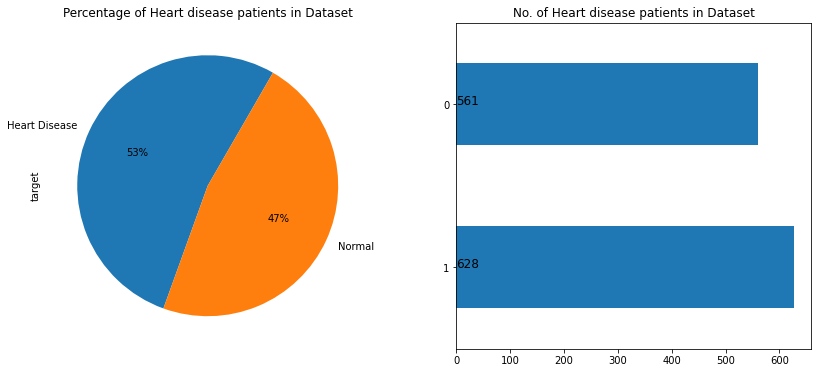

In [16]:
# Plotting attrition of employees
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey=False, figsize=(14,6))

ax1 = dt['target'].value_counts().plot.pie( x="Heart disease" ,y ='no.of patients', 
                   autopct = "%1.0f%%",labels=["Heart Disease","Normal"], startangle = 60,ax=ax1);
ax1.set(title = 'Percentage of Heart disease patients in Dataset')

ax2 = dt["target"].value_counts().plot(kind="barh" ,ax =ax2)
for i,j in enumerate(dt["target"].value_counts().values):
    ax2.text(.5,i,j,fontsize=12)
ax2.set(title = 'No. of Heart disease patients in Dataset')
plt.show()

The dataset is balanced having 629 heart disease patients and 561 normal patients

### Checking Gender & Agewise Distribution

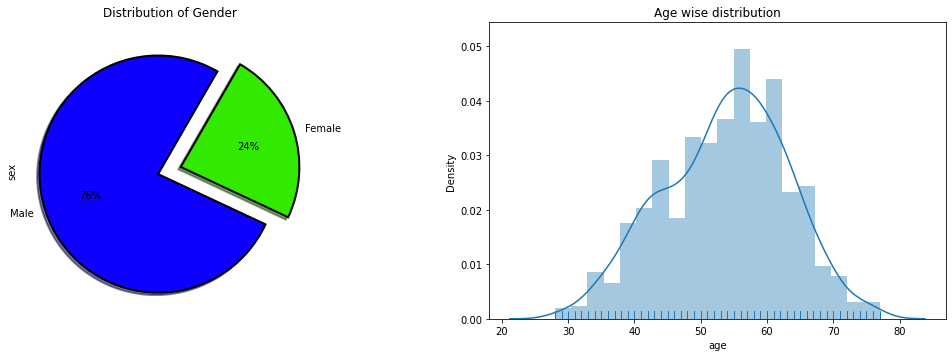

In [17]:
plt.figure(figsize=(18,12))
plt.subplot(221)
dt["sex"].value_counts().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("prism",5),startangle = 60,labels=["Male","Female"],
wedgeprops={"linewidth":2,"edgecolor":"k"},explode=[.1,.1],shadow =True)
plt.title("Distribution of Gender")
plt.subplot(222)
ax= sns.distplot(dt['age'], rug=True)
plt.title("Age wise distribution")
plt.show()

As we can see from above plot, in this dataset males percentage is way too higher than females where as average age of patients is around 55.

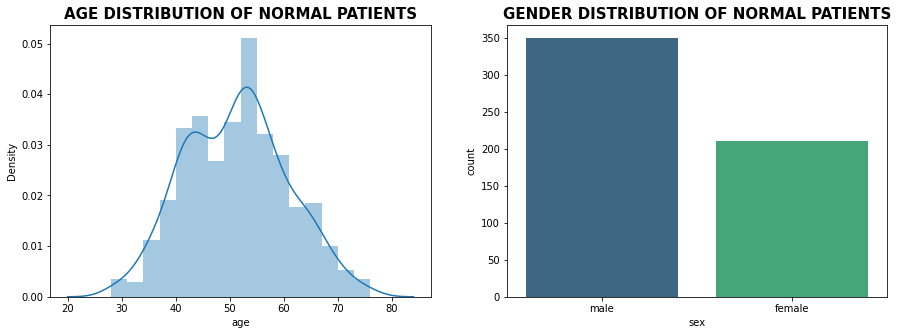

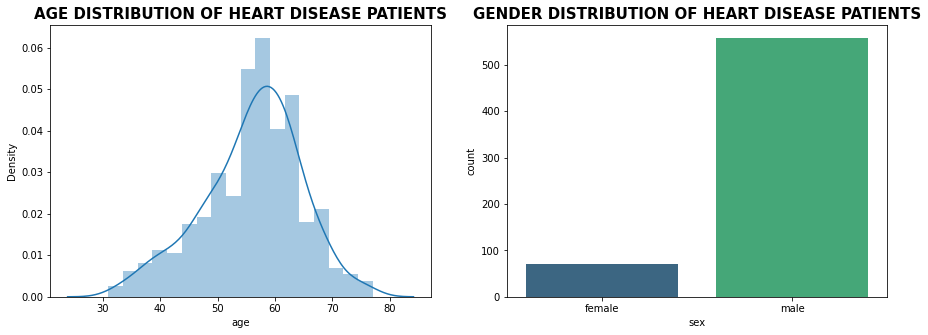

In [18]:
# creating separate df for normal and heart patients

attr_1=dt[dt['target']==1]

attr_0=dt[dt['target']==0]

# plotting normal patients
fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.distplot(attr_0['age'])
plt.title('AGE DISTRIBUTION OF NORMAL PATIENTS', fontsize=15, weight='bold')

ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(attr_0['sex'], palette='viridis')
plt.title('GENDER DISTRIBUTION OF NORMAL PATIENTS', fontsize=15, weight='bold' )
plt.show()

#plotting heart patients

fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.distplot(attr_1['age'])
plt.title('AGE DISTRIBUTION OF HEART DISEASE PATIENTS', fontsize=15, weight='bold')

ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(attr_1['sex'], palette='viridis')
plt.title('GENDER DISTRIBUTION OF HEART DISEASE PATIENTS', fontsize=15, weight='bold' )
plt.show()

As we can see from above plot more patients accounts for heart disease in comparison to females whereas mean age for heart disease patients is around 58 to 60 years

### Distribution of Chest Pain Type

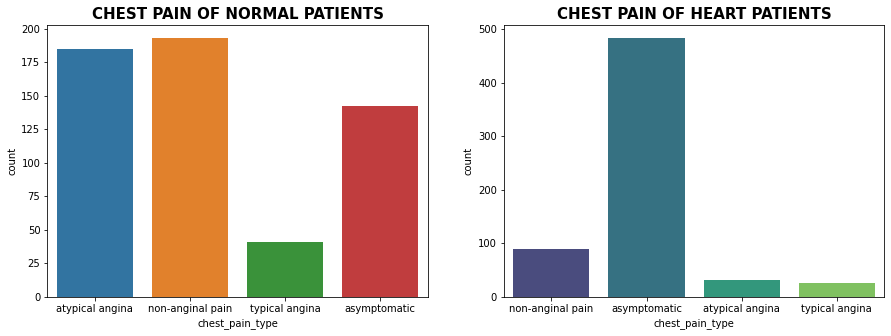

In [19]:

# plotting normal patients
fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.countplot(attr_0['chest_pain_type'])
plt.title('CHEST PAIN OF NORMAL PATIENTS', fontsize=15, weight='bold')

#plotting heart patients
ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(attr_1['chest_pain_type'], palette='viridis')
plt.title('CHEST PAIN OF HEART PATIENTS', fontsize=15, weight='bold' )
plt.show()

In [20]:
#Exploring the Heart Disease patients based on Chest Pain Type
plot_criteria= ['chest_pain_type', 'target']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(dt[plot_criteria[0]], dt[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

target,0,1
chest_pain_type,,
asymptomatic,25.310000,76.910000
atypical angina,32.980000,4.940000
non-anginal pain,34.400000,14.170000
typical angina,7.310000,3.980000


### Distribution of Rest ECG

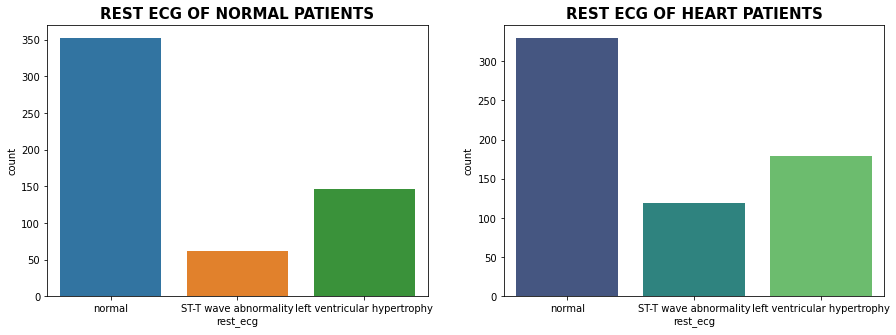

In [21]:
# plotting normal patients
fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.countplot(attr_0['rest_ecg'])
plt.title('REST ECG OF NORMAL PATIENTS', fontsize=15, weight='bold')

#plotting heart patients
ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(attr_1['rest_ecg'], palette='viridis')
plt.title('REST ECG OF HEART PATIENTS', fontsize=15, weight='bold' )
plt.show()

In [24]:
#Exploring the Heart Disease patients based on REST ECG
plot_criteria= ['rest_ecg', 'target']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(dt[plot_criteria[0]], dt[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

target,0,1
rest_ecg,,
ST-T wave abnormality,11.050000,18.950000
left ventricular hypertrophy,26.020000,28.500000
normal,62.920000,52.550000


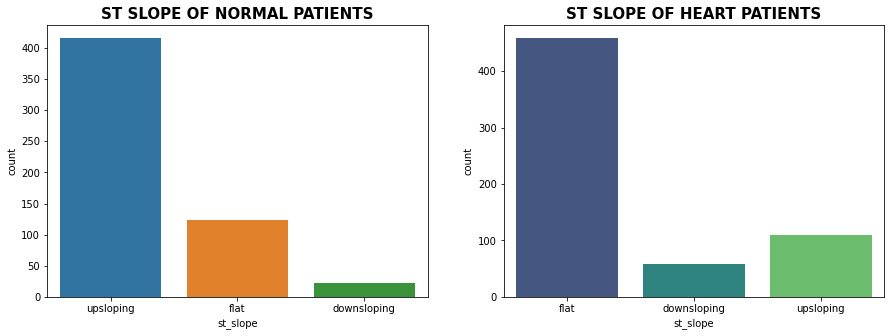

In [25]:
# plotting normal patients
fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.countplot(attr_0['st_slope'])
plt.title('ST SLOPE OF NORMAL PATIENTS', fontsize=15, weight='bold')

#plotting heart patients
ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(attr_1['st_slope'], palette='viridis')
plt.title('ST SLOPE OF HEART PATIENTS', fontsize=15, weight='bold' )
plt.show()

In [26]:
#Exploring the Heart Disease patients based on ST Slope
plot_criteria= ['st_slope', 'target']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(dt[plot_criteria[0]], dt[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

target,0,1
st_slope,,
downsloping,3.920000,9.390000
flat,21.930000,73.090000
upsloping,74.150000,17.520000


### Distribution of Numerical features

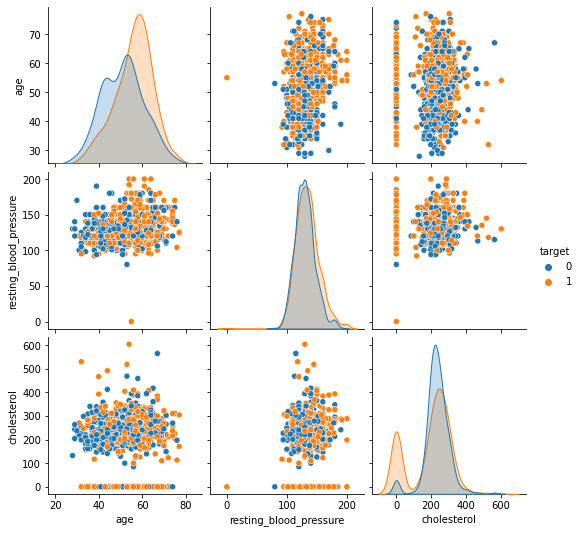

In [31]:
sns.pairplot(dt, hue = 'target', vars = ['age', 'resting_blood_pressure', 'cholesterol'] )

From the above plot it is clear that as the age increases chances of heart disease increases

<AxesSubplot:xlabel='resting_blood_pressure', ylabel='cholesterol'>

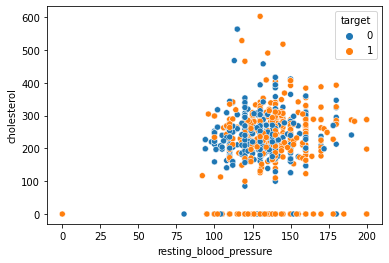

In [34]:
sns.scatterplot(x = 'resting_blood_pressure', y = 'cholesterol', hue = 'target', data = dt)

From the above plot we can see outliers clearly as for some of the patients cholestrol is 0 whereas for one patient both cholestrol and resting bp is 0 which is may be due to missing entries we will filter these ouliers later

<AxesSubplot:xlabel='resting_blood_pressure', ylabel='age'>

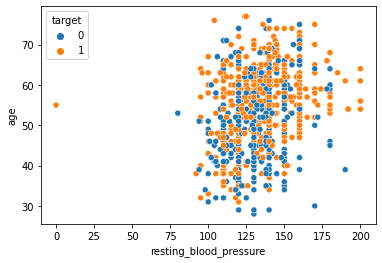

In [35]:
sns.scatterplot(x = 'resting_blood_pressure', y = 'age', hue = 'target', data = dt)

## 6. Outlier Detection & Removal <a id='data-out'></a>

In [36]:
# filtering numeric features as age , resting bp, cholestrol and max heart rate achieved has outliers as per EDA

dt_numeric = dt[['age','resting_blood_pressure','cholesterol','max_heart_rate_achieved']]

In [37]:
dt_numeric.head()

,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved
0,40,140,289,172
1,49,160,180,156
2,37,130,283,98
3,48,138,214,108
4,54,150,195,122


In [38]:
# calculating zscore of numeric columns in the dataset
z = np.abs(stats.zscore(dt_numeric))
print(z)

[[1.46626567 0.4281359  0.7752277  1.26430092]
 [0.5035987  1.51737007 0.29951621 0.63725935]
 [1.78715466 0.11648118 0.71606748 1.63576637]
 ...
 [0.35210527 0.11648118 0.78265797 0.96953469]
 [0.35210527 0.11648118 0.2526458  1.34268112]
 [1.68019167 0.31921249 0.34881639 1.30349102]]


from these points it is diffciult to say which points are outliers so we will now define threshold

In [39]:
# Defining threshold for filtering outliers 
threshold = 3
print(np.where(z > 3))

(array([  30,   76,  109,  149,  242,  366,  371,  391,  400,  450,  592,
        617,  733,  760, 1012, 1038, 1074], dtype=int64), array([2, 2, 1, 2, 1, 1, 3, 3, 1, 1, 1, 2, 1, 1, 1, 2, 1], dtype=int64))


Don’t be confused by the results. The first array contains the list of row numbers and second array respective column numbers, which mean z[30][2] have a Z-score higher than 3. There are total 17 data points which are outliers.

In [40]:
#filtering outliers retaining only those data points which are below threshhold
dt = dt[(z < 3).all(axis=1)]

In [41]:
# checking shape of dataset after outlier removal
dt.shape

(1172, 12)

In [42]:
## encoding categorical variables
dt = pd.get_dummies(dt, drop_first=True)

dt.head()


,age,resting_blood_pressure,cholesterol,fasting_blood_sugar,max_heart_rate_achieved,exercise_induced_angina,st_depression,target,sex_male,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,chest_pain_type_typical angina,rest_ecg_left ventricular hypertrophy,rest_ecg_normal,st_slope_flat,st_slope_upsloping
0,40,140,289,0,172,0,0.0,0,1,1,0,0,0,1,0,1
1,49,160,180,0,156,0,1.0,1,0,0,1,0,0,1,1,0
2,37,130,283,0,98,0,0.0,0,1,1,0,0,0,0,0,1
3,48,138,214,0,108,1,1.5,1,0,0,0,0,0,1,1,0
4,54,150,195,0,122,0,0.0,0,1,0,1,0,0,1,0,1


In [43]:
# checking the shape of dataset
dt.shape

(1172, 16)

In [44]:
# segregating dataset into features i.e., X and target variables i.e., y
X = dt.drop(['target'],axis=1)
y = dt['target']

## Checking Correlation 

<AxesSubplot:title={'center':'Correlation with Diabetes'}>

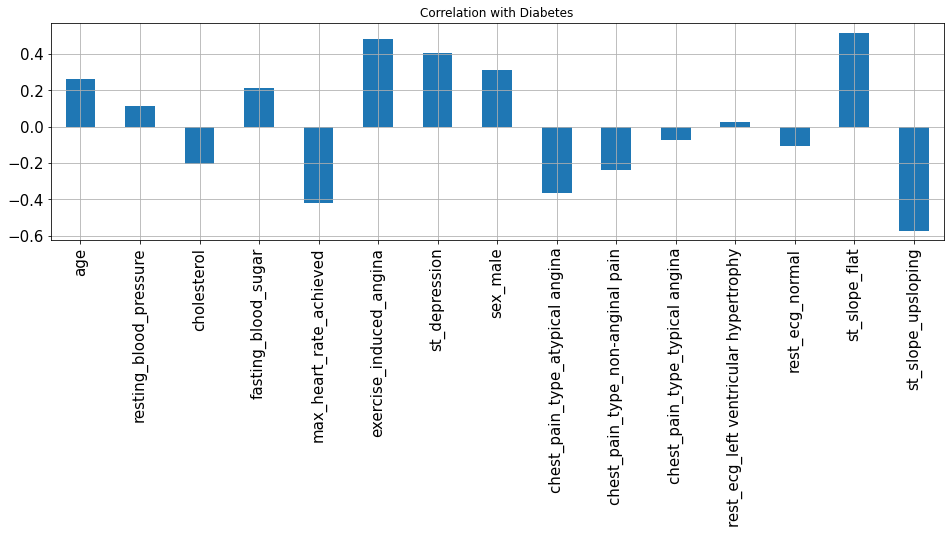

In [46]:
#Correlation with Response Variable class

X.corrwith(y).plot.bar(
        figsize = (16, 4), title = "Correlation with Diabetes", fontsize = 15,
        rot = 90, grid = True)


## TRAIN TEST SPLIT

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2,shuffle=True, random_state=5)

In [48]:
## checking distribution of traget variable in train test split
print('Distribution of traget variable in training set')
print(y_train.value_counts())

print('Distribution of traget variable in test set')
print(y_test.value_counts())

Distribution of traget variable in training set
1    491
0    446
Name: target, dtype: int64
Distribution of traget variable in test set
1    123
0    112
Name: target, dtype: int64


In [49]:
print('------------Training Set------------------')
print(X_train.shape)
print(y_train.shape)

print('------------Test Set------------------')
print(X_test.shape)
print(y_test.shape)

------------Training Set------------------
(937, 15)
(937,)
------------Test Set------------------
(235, 15)
(235,)


### feature normalization
In this step we will normalize all the numeric feature in the range of 0 to 1

In [102]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train[['age','resting_blood_pressure','cholesterol','max_heart_rate_achieved','st_depression']] = scaler.fit_transform(X_train[['age','resting_blood_pressure','cholesterol','max_heart_rate_achieved','st_depression']])
X_train.head()

,age,resting_blood_pressure,cholesterol,fasting_blood_sugar,max_heart_rate_achieved,exercise_induced_angina,st_depression,sex_male,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,chest_pain_type_typical angina,rest_ecg_left ventricular hypertrophy,rest_ecg_normal,st_slope_flat,st_slope_upsloping
478,0.673469,0.193548,0.000000,1,0.303704,1,0.454545,1,0,0,0,0,1,0,0
253,0.673469,0.354839,0.594705,0,0.355556,1,0.194805,1,0,0,0,0,0,0,1
273,0.551020,0.516129,0.409369,0,0.466667,1,0.584416,1,0,0,0,0,1,1,0
111,0.591837,0.623656,0.519348,0,0.185185,1,0.584416,1,0,0,0,0,1,1,0
50,0.448980,0.408602,0.474542,0,0.400000,1,0.454545,1,0,0,0,0,1,1,0


In [51]:
X_test[['age','resting_blood_pressure','cholesterol','max_heart_rate_achieved','st_depression']] = scaler.transform(X_test[['age','resting_blood_pressure','cholesterol','max_heart_rate_achieved','st_depression']])
X_test.head()



,age,resting_blood_pressure,cholesterol,fasting_blood_sugar,max_heart_rate_achieved,exercise_induced_angina,st_depression,sex_male,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,chest_pain_type_typical angina,rest_ecg_left ventricular hypertrophy,rest_ecg_normal,st_slope_flat,st_slope_upsloping
1024,0.693878,0.301075,0.572301,0,0.266667,0,0.376623,1,1,0,0,1,0,1,0
182,0.469388,0.408602,0.456212,0,0.614815,0,0.194805,1,1,0,0,0,1,0,1
785,0.346939,0.494624,0.480652,0,0.629630,1,0.220779,0,0,0,0,1,0,1,0
924,0.591837,0.623656,0.562118,0,0.333333,1,0.272727,1,0,0,0,1,0,1,0
780,0.612245,0.387097,0.527495,0,0.466667,1,0.584416,1,0,0,0,1,0,1,0


In [52]:
X_train.shape

(937, 15)

In [53]:
y_train

478     1
253     0
273     1
111     1
50      1
       ..
1168    0
1095    0
760     0
1083    0
599     1
Name: target, Length: 937, dtype: int64

## Deep Learning Model

In [54]:
from keras.models import Sequential
#from keras.models import Dense
#from keras.layers.core import Dense
from tensorflow.keras.layers import Embedding, Dense, Input, Dropout, LSTM, Activation, Conv2D, Reshape, Average, Bidirectional

model = Sequential()
model.add(Dense(64, activation='relu', input_dim = (15)))
model.add(Dense(32 ,activation='relu'))
model.add(Dense(16 ,activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics =['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                1024      
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 3,649
Trainable params: 3,649
Non-trainable params: 0
_________________________________________________________________


In [98]:
history=model.fit(X_train,y_train, batch_size = 8, epochs = 50, verbose = 1, validation_data=(X_test,y_test))

Epoch 1/50
118/118 [==============================] - 1s 5ms/step - loss: 4.2505 - accuracy: 0.7492 - val_loss: 2.3028 - val_accuracy: 0.8043
Epoch 2/50
118/118 [==============================] - 0s 2ms/step - loss: 1.5123 - accuracy: 0.8154 - val_loss: 0.9912 - val_accuracy: 0.7957
Epoch 3/50
118/118 [==============================] - 0s 2ms/step - loss: 0.7629 - accuracy: 0.8250 - val_loss: 0.6457 - val_accuracy: 0.8213
Epoch 4/50
118/118 [==============================] - 0s 2ms/step - loss: 0.5565 - accuracy: 0.8431 - val_loss: 0.5598 - val_accuracy: 0.8298
Epoch 5/50
118/118 [==============================] - 0s 2ms/step - loss: 0.4979 - accuracy: 0.8495 - val_loss: 0.5317 - val_accuracy: 0.8213
Epoch 6/50
118/118 [==============================] - 0s 2ms/step - loss: 0.4707 - accuracy: 0.8506 - val_loss: 0.5242 - val_accuracy: 0.8255
Epoch 7/50
118/118 [==============================] - 0s 2ms/step - loss: 0.4555 - accuracy: 0.8581 - val_loss: 0.5159 - val_accuracy: 0.8255
Epoch 

## MODEL EVALUATION

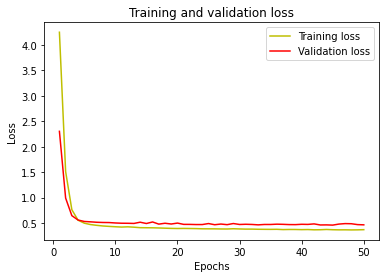

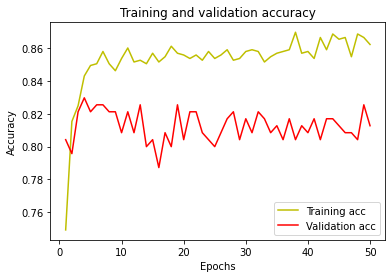

<AxesSubplot:>

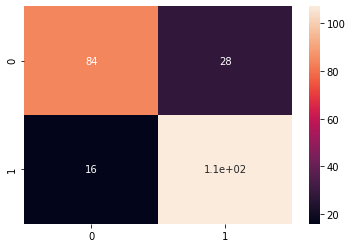

In [99]:
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

 #from keras.models import load_model
 #saved_model = load_model('models/best_model.h5')

# Predicting the Test set results
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True)

In [100]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.75      0.79       112
           1       0.79      0.87      0.83       123

    accuracy                           0.81       235
   macro avg       0.82      0.81      0.81       235
weighted avg       0.82      0.81      0.81       235



## MODEL OPTIMIZATION

##MODEL REGULAZATION

This is a form of regression, that constrains/ regularizes or shrinks the coefficient estimates towards zero. In other words, this technique discourages learning a more complex or flexible model, so as to avoid the risk of overfitting

In [95]:
from keras import regularizers
from tensorflow.keras.layers import Dropout
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense



In [96]:
model = Sequential()
model= Sequential([Dense(64, activation='relu', input_dim = (15)),
                  Dense(32,activation='relu',kernel_regularizer=regularizers.L2(0.1)),
                  Dense(16,activation='relu',kernel_regularizer=regularizers.L2(0.1)),
                  Dense(1,activation='sigmoid')])
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics =['accuracy'])

model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_29 (Dense)             (None, 64)                1024      
_________________________________________________________________
dense_30 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_31 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_32 (Dense)             (None, 1)                 17        
Total params: 3,649
Trainable params: 3,649
Non-trainable params: 0
_________________________________________________________________


##ADDITIONAL NEURONS ADDED

In [94]:
model = Sequential()
model.add(Dense(32, activation='relu', input_dim = (15)))
model.add(Dropout(0.5))
model.add(Dense(32 ,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(16 ,activation='relu'))
model.add(Dense(48 ,activation='relu'))
model.add(Dense(48 ,activation='relu'))
model.add(Dense(16 ,activation='relu'))
model.add(Dense(1, activation='sigmoid'))


model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics =['accuracy'])

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 32)                512       
_________________________________________________________________
dropout_4 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_23 (Dense)             (None, 32)                1056      
_________________________________________________________________
dropout_5 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_24 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_25 (Dense)             (None, 48)                816       
_________________________________________________________________
dense_26 (Dense)             (None, 48)               

In [92]:
history=model.fit(X_train,y_train, batch_size = 8, epochs = 10, verbose = 1, validation_data=(X_test,y_test))

Epoch 1/10
118/118 [==============================] - 0s 3ms/step - loss: 0.3837 - accuracy: 0.8399 - val_loss: 0.4261 - val_accuracy: 0.8085
Epoch 2/10
118/118 [==============================] - 0s 2ms/step - loss: 0.3954 - accuracy: 0.8410 - val_loss: 0.4252 - val_accuracy: 0.8043
Epoch 3/10
118/118 [==============================] - 0s 3ms/step - loss: 0.3591 - accuracy: 0.8538 - val_loss: 0.4311 - val_accuracy: 0.8128
Epoch 4/10
118/118 [==============================] - 0s 2ms/step - loss: 0.3608 - accuracy: 0.8570 - val_loss: 0.4396 - val_accuracy: 0.8128
Epoch 5/10
118/118 [==============================] - 0s 2ms/step - loss: 0.3557 - accuracy: 0.8517 - val_loss: 0.4390 - val_accuracy: 0.8000
Epoch 6/10
118/118 [==============================] - 0s 2ms/step - loss: 0.3599 - accuracy: 0.8527 - val_loss: 0.4458 - val_accuracy: 0.8128
Epoch 7/10
118/118 [==============================] - 0s 3ms/step - loss: 0.3524 - accuracy: 0.8591 - val_loss: 0.4433 - val_accuracy: 0.8128
Epoch 

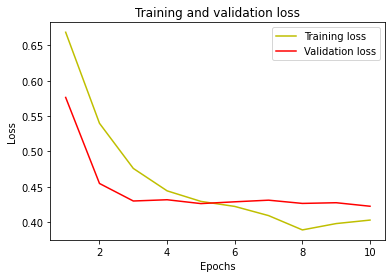

In [91]:
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

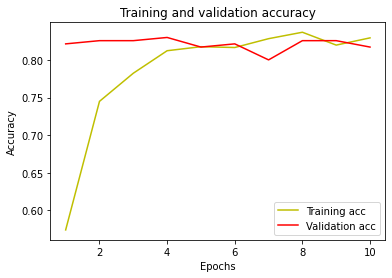

In [90]:

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [108]:
value =[[0.673469,0.193548,0.000000,1,0.303704,1,0.454545,1,0,0,0,0,1,0,0]]



prediction=model.predict_classes(value)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [109]:
print(prediction)

[[1]]
